<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW2_GMM_Other_algorithm_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

In [413]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.1 Import Libraries and Read the Data from CSV

In [414]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from scipy import linalg
import matplotlib as mpl

from sklearn import mixture

In [415]:
path = '/content/drive/My Drive/Underdog/data/Asteroid_Updated.csv'

data = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [416]:
data.head()

name         a         e  ...         n          per          ma
0    Ceres  2.769165  0.076009  ...  0.213885  1683.145708   77.372096
1   Pallas  2.772466  0.230337  ...  0.213503  1686.155999   59.699133
2     Juno  2.669150  0.256942  ...  0.226019  1592.787285   34.925016
3    Vesta  2.361418  0.088721  ...  0.271609  1325.432765   95.861936
4  Astraea  2.574249  0.191095  ...  0.238632  1508.600458  282.366289

[5 rows x 31 columns]

# 1.2 Data Cleaning and Preparation

## Check Missing and Drop Rows With No Data For Diameter and Rotation Period Data Feature . There are 83% Missing Diameter Data and 97% Missing Rotation Period Data

In [417]:
data.isnull().sum()/data.shape[0] * 100

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

In [418]:
data.shape

(839714, 31)

In [419]:
data.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

## Drop Missing Rows Data for Diameter, Rotation Period, Albedo

In [420]:
data = data.dropna(subset=['diameter','rot_per','albedo'])
data.shape

(11154, 31)

In [421]:
data.isnull().sum()

name               5744
a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter              0
extent            11142
albedo                0
rot_per               0
GM                11142
BV                10176
UB                10216
IR                11153
spec_B            10044
spec_T            10217
G                 11037
moid                  0
class                 0
n                     0
per                   0
ma                    0
dtype: int64

## Drop Columns with missing data and convert string data to categorical data

In [422]:
data.drop(['name', 'extent','IR','spec_B','spec_T'], axis=1, inplace=True)
data.isnull().sum()

a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter              0
albedo                0
rot_per               0
GM                11142
BV                10176
UB                10216
G                 11037
moid                  0
class                 0
n                     0
per                   0
ma                    0
dtype: int64

## Check the diameter and rotation period data if all Numeric. Diameter data is Object 

In [423]:
data.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [424]:
data.head()

a         e          i  ...         n          per          ma
0  2.769165  0.076009  10.594067  ...  0.213885  1683.145708   77.372096
1  2.772466  0.230337  34.836234  ...  0.213503  1686.155999   59.699133
2  2.669150  0.256942  12.988919  ...  0.226019  1592.787285   34.925016
3  2.361418  0.088721   7.141771  ...  0.271609  1325.432765   95.861936
4  2.574249  0.191095   5.366988  ...  0.238632  1508.600458  282.366289

[5 rows x 26 columns]

## Convert Some Data to Float

In [425]:
data['diameter'] = data['diameter'].astype(float) 
data['condition_code'] = data['condition_code'].astype(float) 
#this will label as one hot vectors (neo and pha string values to int)
# data['neo'] = data['neo'].map({1: 'Y', 2: 'N'}).astype(float)
data['neo'] = data['neo'].astype('category').cat.codes
data['pha'] = data['pha'].astype('category').cat.codes
data['class'] = data['class'].astype('category').cat.codes
# data['pha'] = data['pha'].map({1: 'Y', 2: 'N'}).astype(float)
data.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo                  int8
pha                  int8
diameter          float64
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
G                 float64
moid              float64
class                int8
n                 float64
per               float64
ma                float64
dtype: object

In [426]:
data.head()

a         e          i  ...         n          per          ma
0  2.769165  0.076009  10.594067  ...  0.213885  1683.145708   77.372096
1  2.772466  0.230337  34.836234  ...  0.213503  1686.155999   59.699133
2  2.669150  0.256942  12.988919  ...  0.226019  1592.787285   34.925016
3  2.361418  0.088721   7.141771  ...  0.271609  1325.432765   95.861936
4  2.574249  0.191095   5.366988  ...  0.238632  1508.600458  282.366289

[5 rows x 26 columns]

In [427]:
data.round(1)

a    e     i     om      w    q  ...    G  moid  class    n     per     ma
0       2.8  0.1  10.6   80.3   73.6  2.6  ...  0.1   1.6      6  0.2  1683.1   77.4
1       2.8  0.2  34.8  173.1  310.0  2.1  ...  0.1   1.2      6  0.2  1686.2   59.7
2       2.7  0.3  13.0  169.9  248.1  2.0  ...  0.3   1.0      6  0.2  1592.8   34.9
3       2.4  0.1   7.1  103.8  150.7  2.2  ...  0.3   1.1      6  0.3  1325.4   95.9
4       2.6  0.2   5.4  141.6  358.7  2.1  ...  NaN   1.1      6  0.2  1508.6  282.4
...     ...  ...   ...    ...    ...  ...  ...  ...   ...    ...  ...     ...    ...
694201  2.3  0.6  12.2  182.7  325.8  1.0  ...  NaN   0.0      1  0.3  1240.3  188.0
699814  2.3  0.6  25.5  178.8   82.0  1.0  ...  NaN   0.3      1  0.3  1237.1  158.0
704641  0.9  0.3  26.4  257.6  144.5  0.6  ...  NaN   0.0      3  1.3   286.6  315.5
721964  2.8  0.7  23.8  277.5  115.4  0.9  ...  NaN   0.1      1  0.2  1678.0  350.9
729174  2.4  0.5  48.0  114.6   12.8  1.1  ...  NaN   0.1      0  0.3  1380.8   44.7

[11154 rows x 26 columns]

In [428]:
data.isnull().sum()/data.shape[0] * 100

a                  0.000000
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000000
per_y              0.000000
data_arc           0.000000
condition_code     0.000000
n_obs_used         0.000000
H                  0.000000
neo                0.000000
pha                0.000000
diameter           0.000000
albedo             0.000000
rot_per            0.000000
GM                99.892415
BV                91.231845
UB                91.590461
G                 98.951049
moid               0.000000
class              0.000000
n                  0.000000
per                0.000000
ma                 0.000000
dtype: float64

In [429]:
# Drop columns with NaN
data.drop(['GM','BV','UB','G'], axis=1, inplace=True)
data.head()

a         e          i  ...         n          per          ma
0  2.769165  0.076009  10.594067  ...  0.213885  1683.145708   77.372096
1  2.772466  0.230337  34.836234  ...  0.213503  1686.155999   59.699133
2  2.669150  0.256942  12.988919  ...  0.226019  1592.787285   34.925016
3  2.361418  0.088721   7.141771  ...  0.271609  1325.432765   95.861936
4  2.574249  0.191095   5.366988  ...  0.238632  1508.600458  282.366289

[5 rows x 22 columns]

# 1.3 Perform data correlation and histogram. Data that has higher correlation are H(asteroid’s absolute magnitude) and diameter, H(asteroid’s absolute magnitude) and data_arc with correlation greater than 70%.

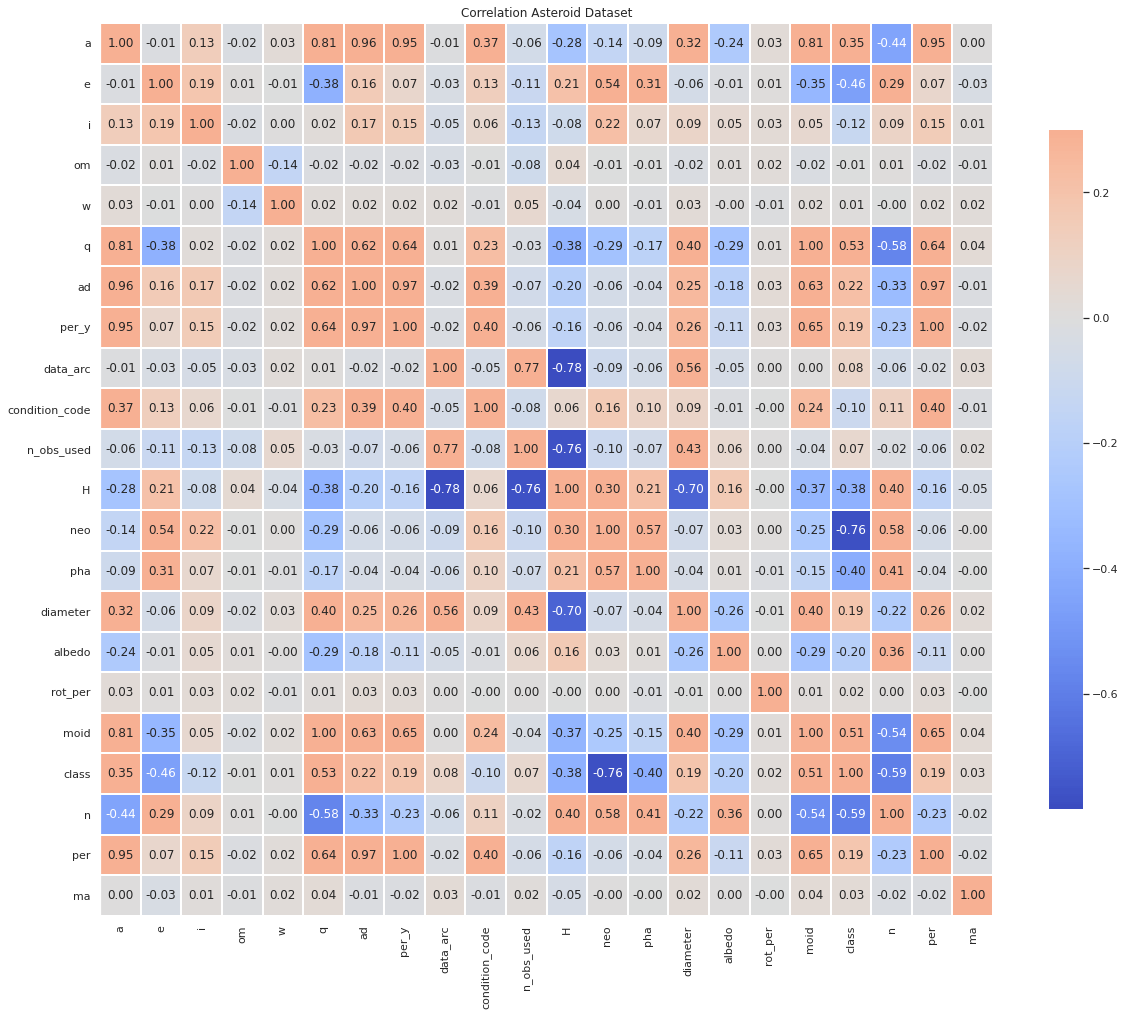

In [337]:
# Perform correlation
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,25)
plt.title('Correlation Asteroid Dataset')
plt.show()

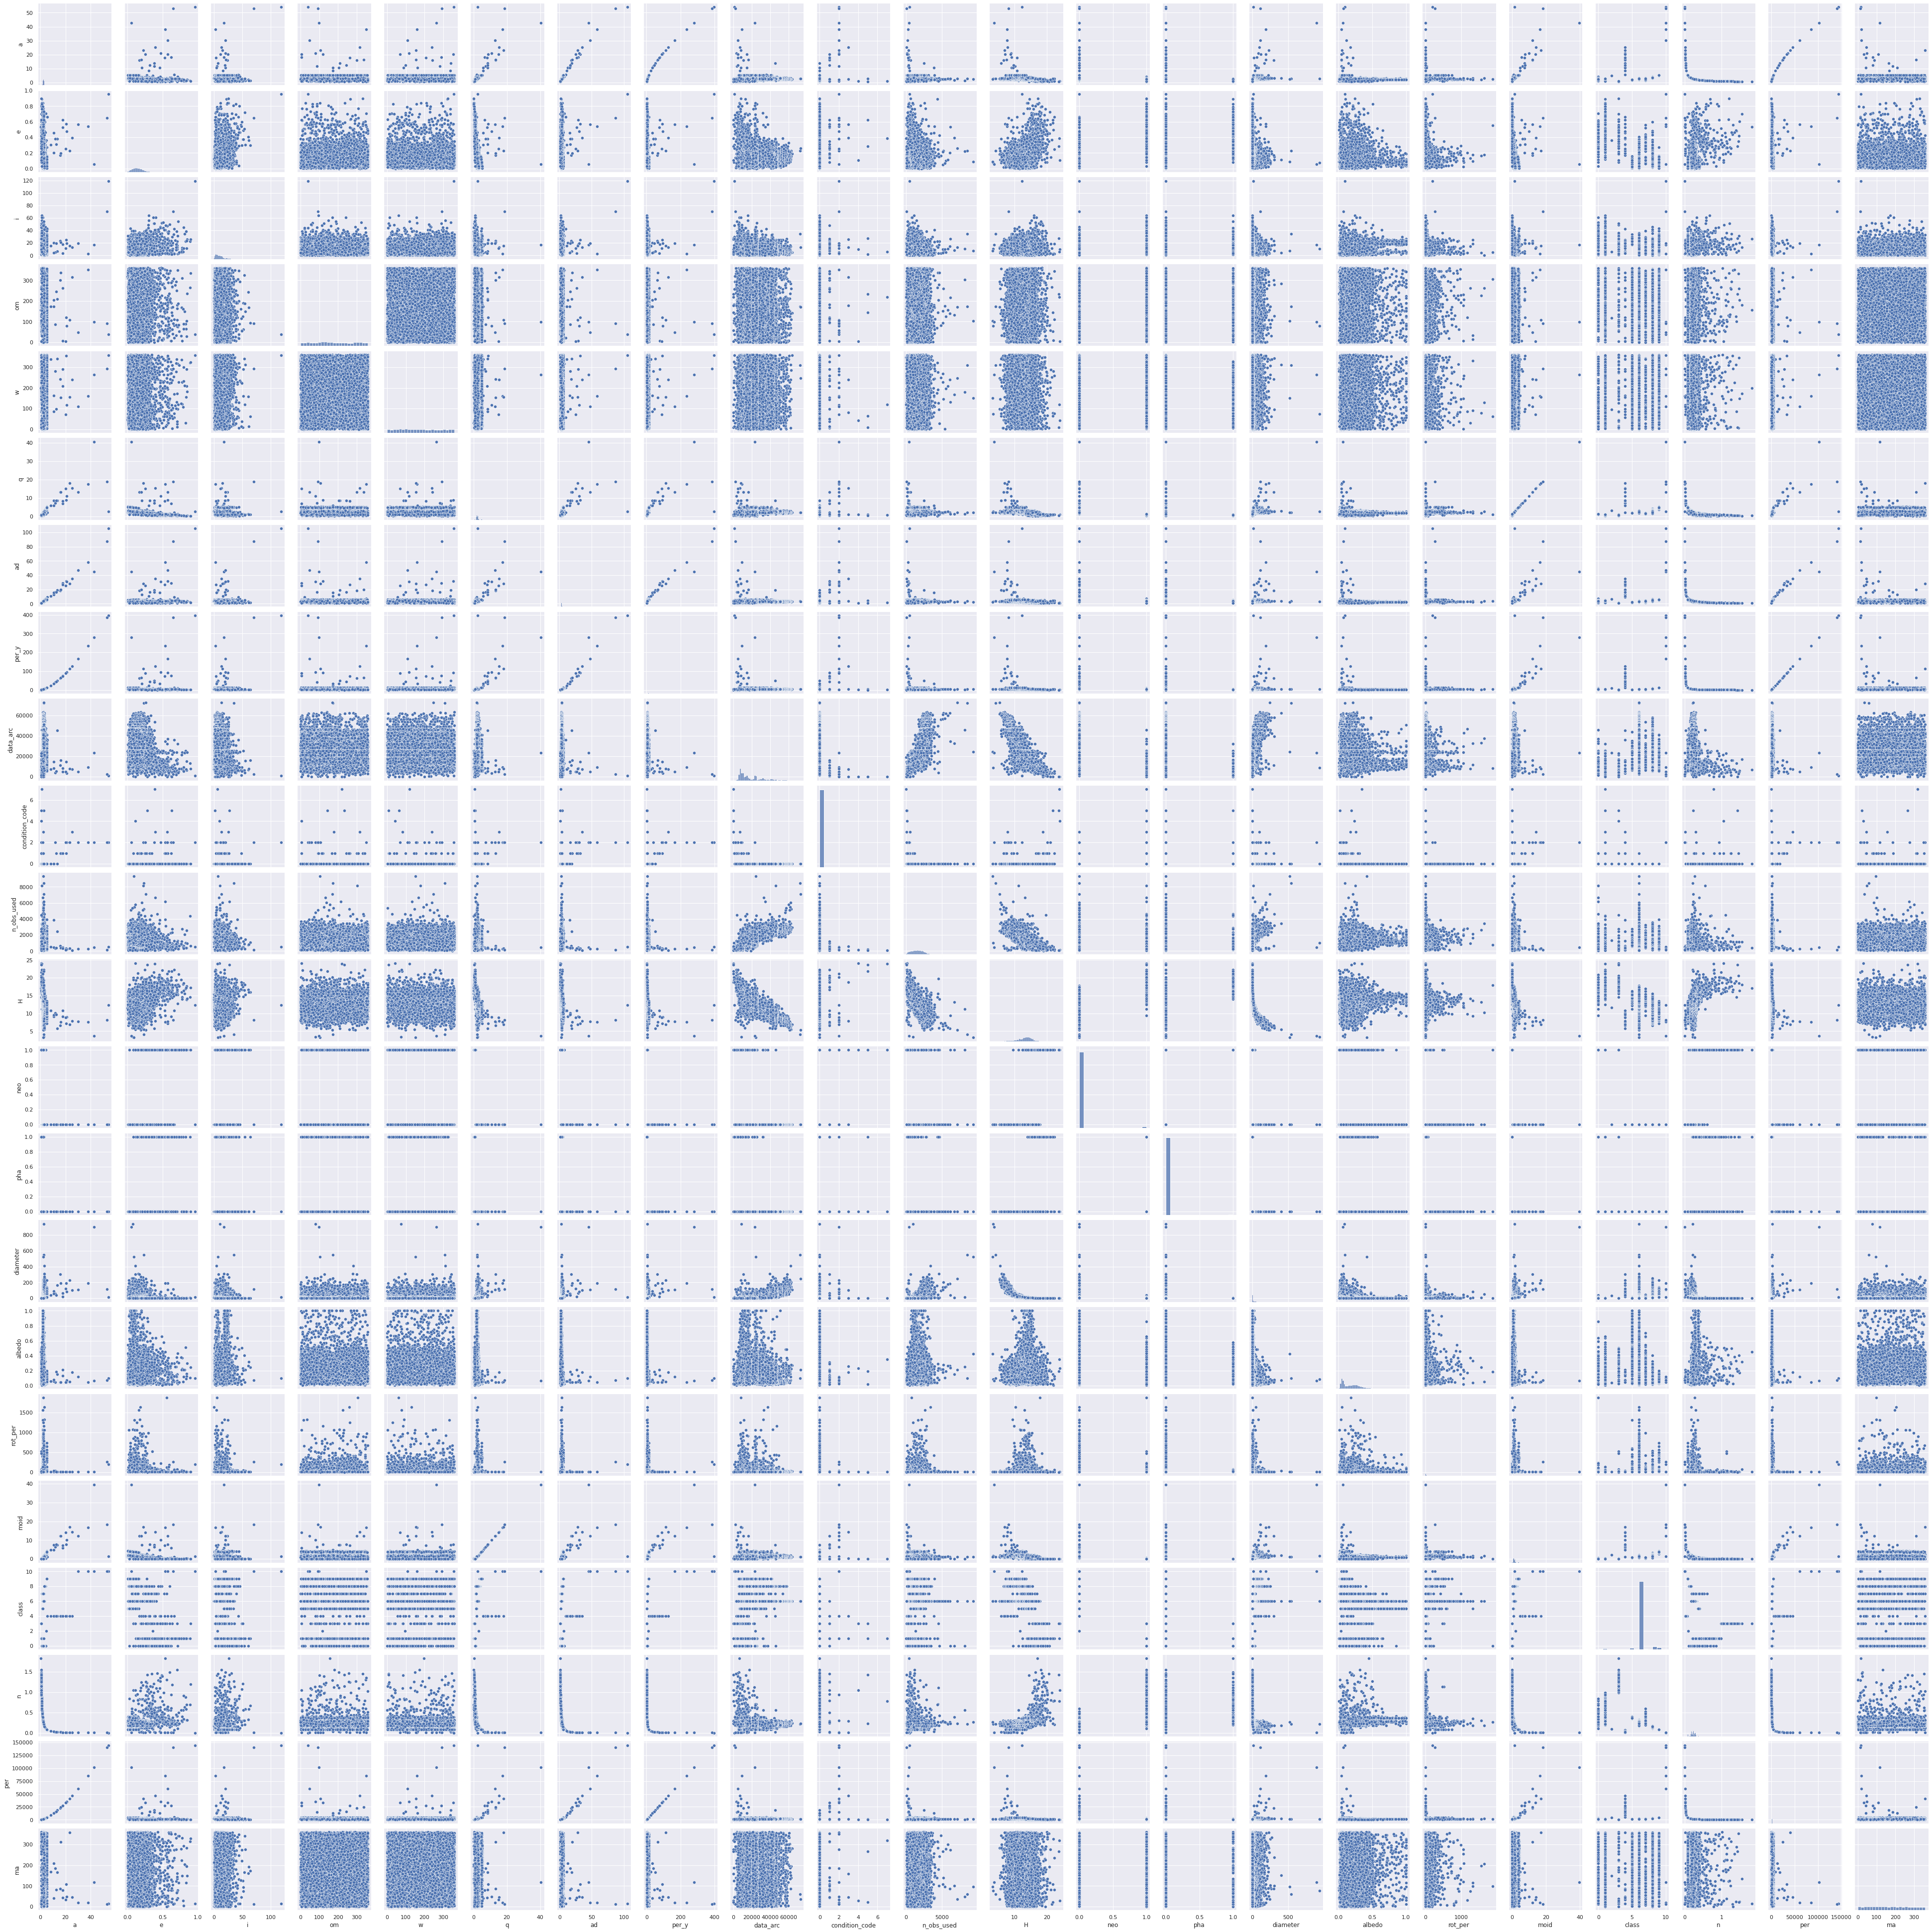

In [338]:
sns.pairplot(data, diag_kind="hist")

# 1.4 Performing PCA Dimensionality Reduction

This curve quantifies how much of the total, 21-dimensional variance is contained within the first  𝑁  components. 

We see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 2 components to retain 90% of the variance. 

In [433]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [434]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [435]:
print(pca.components_)

[[-1.21222904e-06 -2.46396641e-07 -2.96790986e-05 -2.80326086e-04
   1.45937624e-04  4.51438121e-07 -2.87589621e-06 -1.29402422e-05
   9.98741268e-01 -6.15549414e-07  4.99143040e-02 -1.33599381e-04
  -1.17405885e-06 -4.49317334e-07  1.38238457e-03 -6.27064167e-07
   1.97375756e-05  1.50108935e-07  7.34479604e-06 -4.64199898e-07
  -4.72642347e-03  2.69454183e-04]
 [ 4.34303934e-04  2.32232013e-06  4.04051182e-04 -6.56213762e-04
   9.48368529e-04  2.00619980e-04  6.67987888e-04  2.73759005e-03
   5.32330623e-03  2.04883597e-05 -1.19199631e-02 -1.40246661e-04
  -3.46032891e-06 -1.25938534e-06  3.03821957e-03 -6.36658315e-06
   8.38583560e-04  2.00813202e-04  7.81680782e-05 -7.99703080e-06
   9.99904767e-01 -6.08855090e-04]
 [-5.96008156e-05 -2.45067797e-05 -1.87743122e-03 -2.13678085e-02
   1.53923945e-02 -2.30672212e-05 -9.61344100e-05  3.32198805e-05
  -4.98453851e-02 -7.41376970e-06  9.98329017e-01 -1.06210783e-03
  -1.60342484e-05 -7.86825803e-06  1.03072582e-03  4.47673536e-05
   1.3

In [436]:
print(pca.explained_variance_)

[1.38595199e+08 6.62503493e+06 2.32355340e+05 1.20873716e+04]


Text(0.5, 1.0, 'The number of components needed to explain variance')

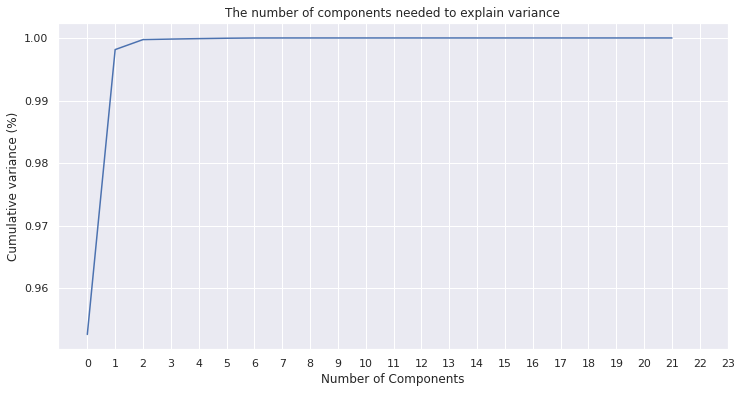

In [437]:
plt.rcParams["figure.figsize"] = (12,6)
pca = PCA().fit(data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 24, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# 1.5 Perform Gaussian Mixture Model Selection

In [443]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(data)
        bic.append(gmm.bic(data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

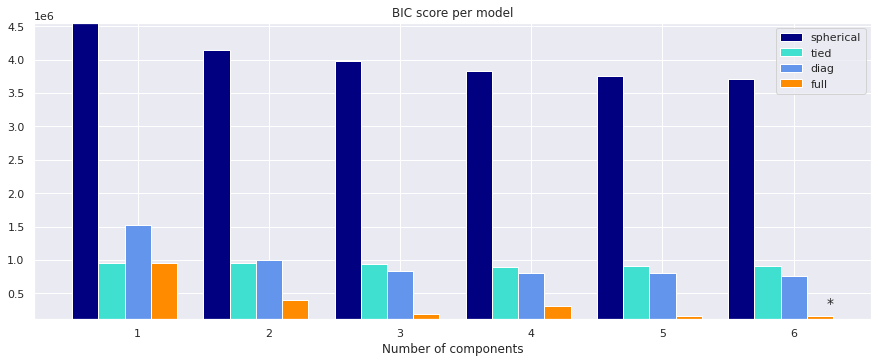

In [444]:
# Plot the BIC scores
plt.figure(figsize=(15, 12))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


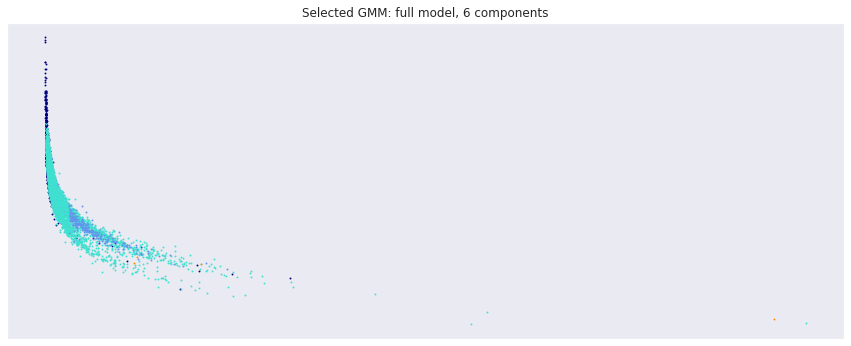

In [445]:
# Plot the winner
plt.figure(figsize=(15, 12))
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(data)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

# 2. Applying Gaussian Mixture Model to Selected Dataset diameter and rotation period


In [446]:
## Use diameter and rotation period dataset for the GMM
X = data.iloc[:, [14, 16]].values
print(X)

[[9.39400e+02 9.07417e+00]
 [5.45000e+02 7.81320e+00]
 [2.46596e+02 7.21000e+00]
 ...
 [3.25000e-01 1.60000e+01]
 [6.94000e-01 5.20600e+00]
 [1.62600e+00 6.83000e+00]]


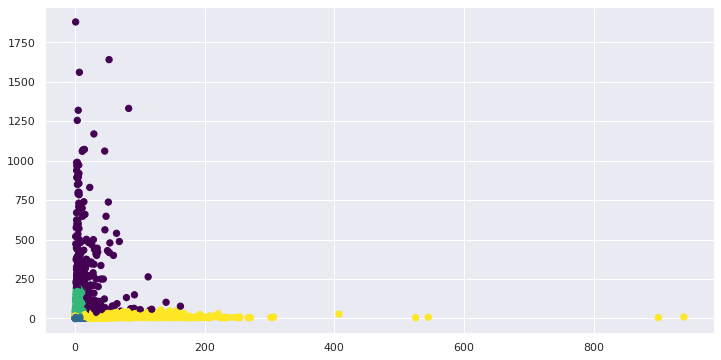

In [447]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [448]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


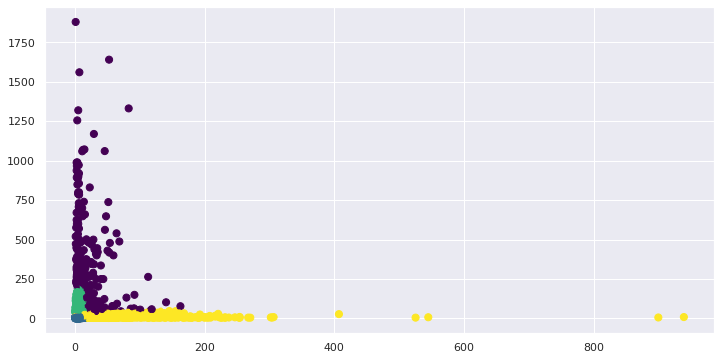

In [449]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

## Let's create a function that will help us visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

In [450]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    # w_factor = 0.2 / gmm.weights_.max()
    # for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
    #     draw_ellipse(pos, covar, alpha=w * w_factor)

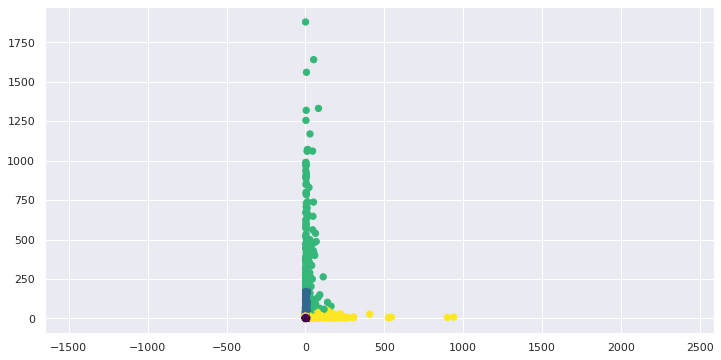

In [451]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

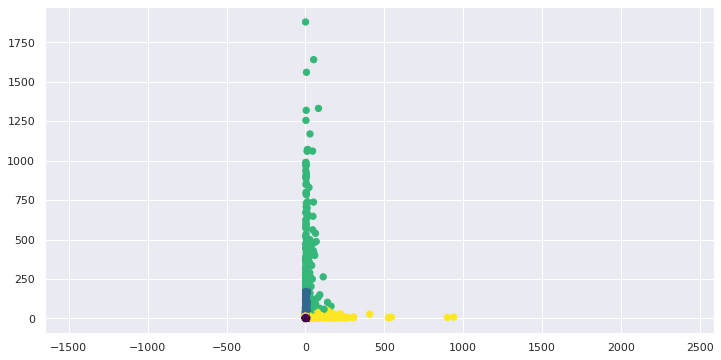

In [452]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X)

# 3. Perform Kmeans, Ward Agglomerative and other Algorithm Using DBSCAN and mean-shift

In [453]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

## Perform Elbow Method

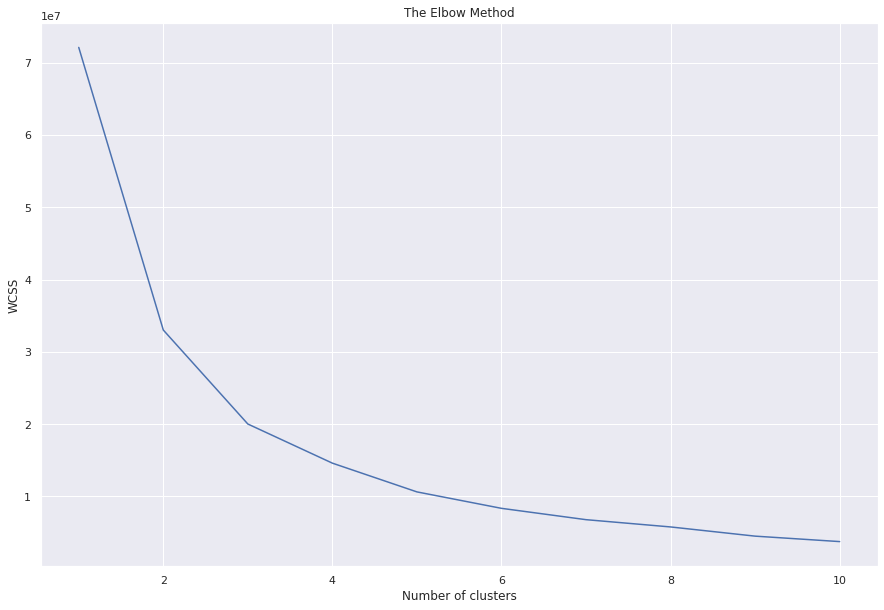

In [454]:
from sklearn.cluster import KMeans
plt.figure(figsize=(15,10))
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Kmeans

In [455]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

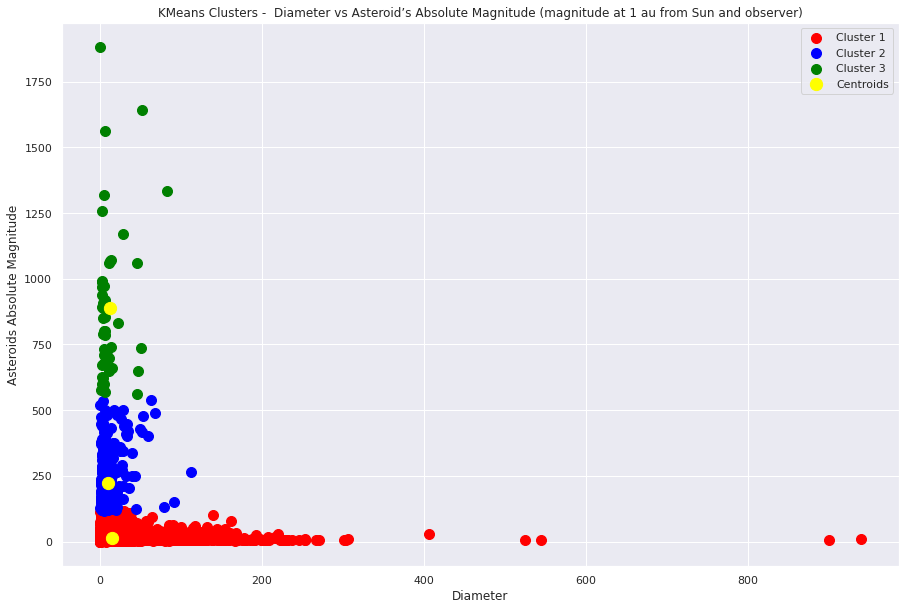

In [456]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters -  Diameter vs Asteroid’s Absolute Magnitude (magnitude at 1 au from Sun and observer)')
plt.xlabel('Diameter')
plt.ylabel('Asteroids Absolute Magnitude')
plt.legend()
plt.show()

## Ward Agglomerative Clustering

In [457]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np

Agglomerative Clustering Using Ward Method
[3 3 3 ... 0 0 0]


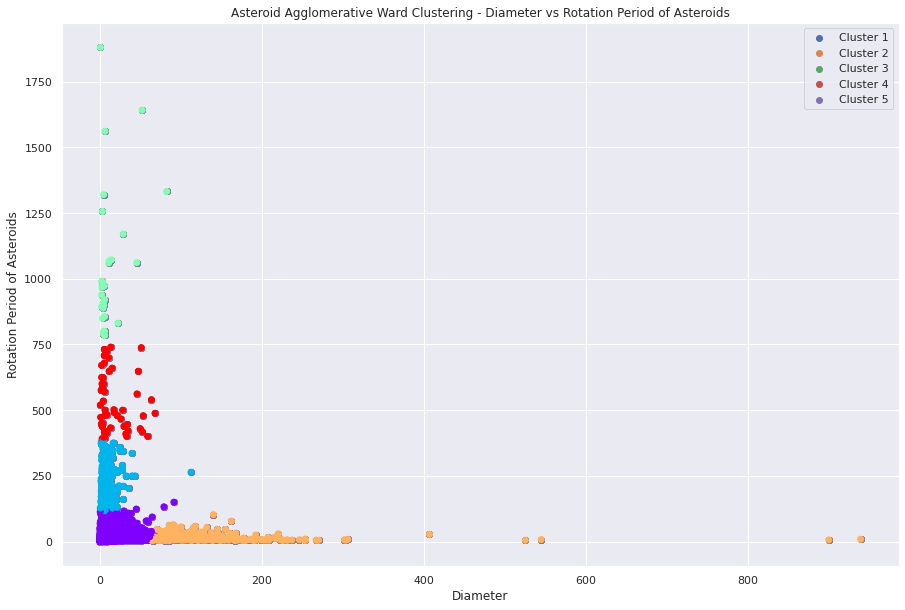

In [458]:
plt.figure(figsize=(15,10))
data1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_pred = data1.fit_predict(X)
print('Agglomerative Clustering Using Ward Method')
print(hc_pred)
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 1')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 2')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 3')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 4')
plt.scatter(X[:, 0], X[:, 1], cmap = 'rainbow', label = 'Cluster 5')
plt.scatter(X[:, 0], X[:, 1], c=data1.labels_, cmap='rainbow')
plt.title('Asteroid Agglomerative Ward Clustering - Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.legend()
plt.show()

## DBSCAN

In [459]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [460]:
Sc = StandardScaler()
X = Sc.fit_transform(X)
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(labels[500:560])
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

[ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Estimated number of clusters: 1
Estimated number of noise points: 128
Silhouette Coefficient: 0.892


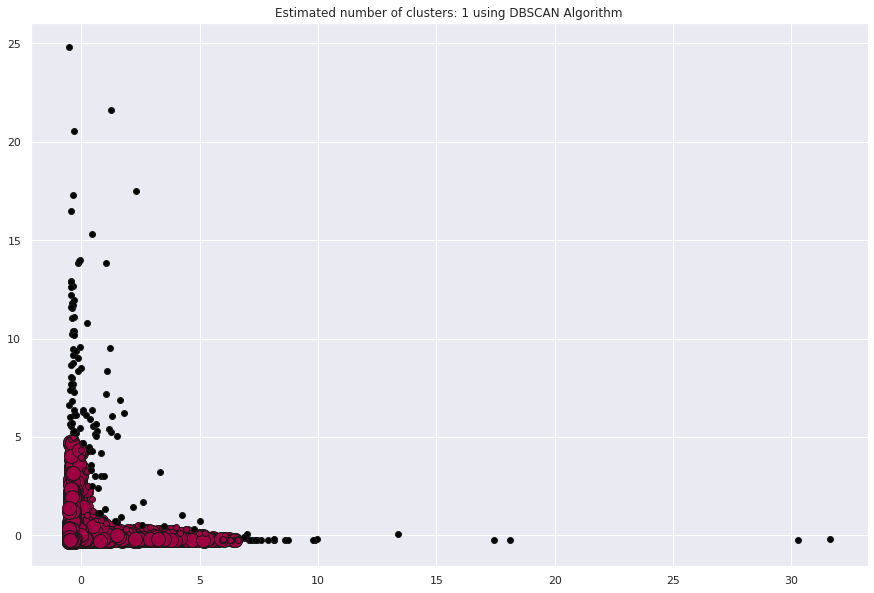

In [461]:
# Plot result
plt.figure(figsize=(15,10))
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)


plt.title('Estimated number of clusters: %d using DBSCAN Algorithm' % n_clusters_)
plt.show()

## Mean-Shift

In [462]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=11888)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 37


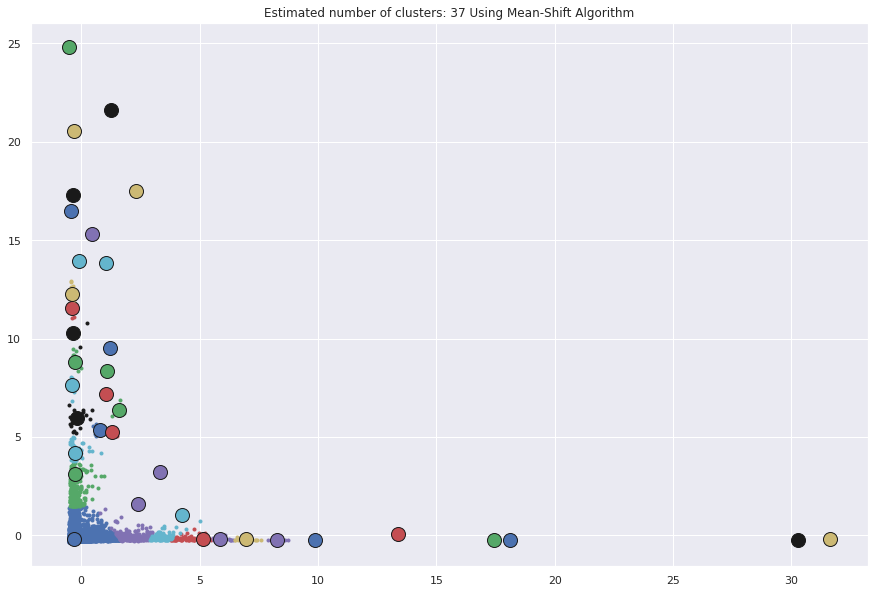

In [463]:
# Plot result
plt.figure(figsize=(15,10))

import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d Using Mean-Shift Algorithm' % n_clusters_)
plt.show()

# 4. Use other dataset for further Clustering Analysis

In [469]:
## Use absolute magnitude H and diameter for the KMeans samples for all algorithm
## 	H - absolute magnitude (magnitude at 1 au from Sun and observer)
X = data.iloc[:, [11, 14]].values
print(X)

[[3.34000e+00 9.39400e+02]
 [4.13000e+00 5.45000e+02]
 [5.33000e+00 2.46596e+02]
 ...
 [1.89000e+01 3.25000e-01]
 [1.79000e+01 6.94000e-01]
 [1.88000e+01 1.62600e+00]]


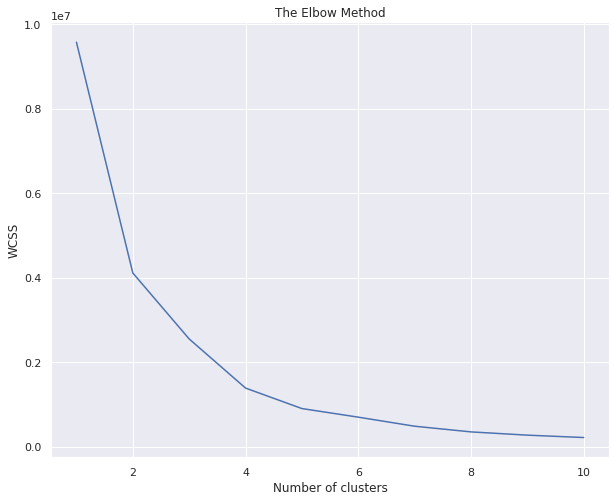

In [471]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,8))
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [477]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

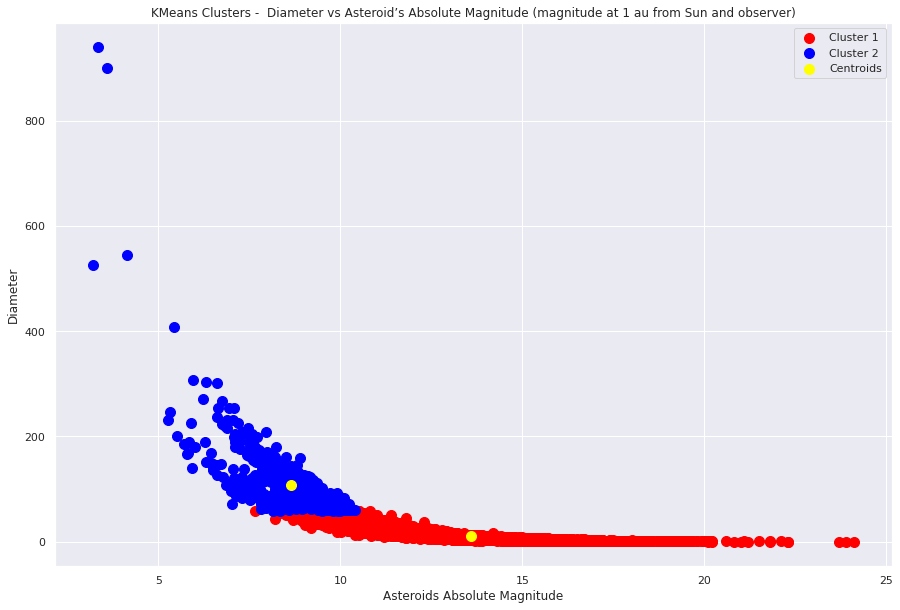

In [479]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters -  Diameter vs Asteroid’s Absolute Magnitude (magnitude at 1 au from Sun and observer)')
plt.xlabel('Asteroids Absolute Magnitude')
plt.ylabel('Diameter')
plt.legend()
plt.show()

# 5. Implement Kmeans Pytorch

In [ ]:
!pip install kmeans-pytorch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [ ]:
# data
data_size, dims, num_clusters = X, 2, 3
x = torch.from_numpy(X)

In [ ]:
print(x)

tensor([[9.3940e+02, 9.0742e+00],
        [5.4500e+02, 7.8132e+00],
        [2.4660e+02, 7.2100e+00],
        ...,
        [3.2500e-01, 1.6000e+01],
        [6.9400e-01, 5.2060e+00],
        [1.6260e+00, 6.8300e+00]], dtype=torch.float64)


In [ ]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean'
)

[running kmeans]: 8it [00:00, 46.41it/s, center_shift=3668.177734, iteration=9, tol=0.000100]

running k-means on cpu..


[running kmeans]: 23it [00:00, 66.57it/s, center_shift=0.000000, iteration=23, tol=0.000100]


In [ ]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 1, 1,  ..., 1, 1, 1])
tensor([[ 10.5282, 222.6761],
        [ 15.5346,  12.6994],
        [ 12.7203, 887.5752]])


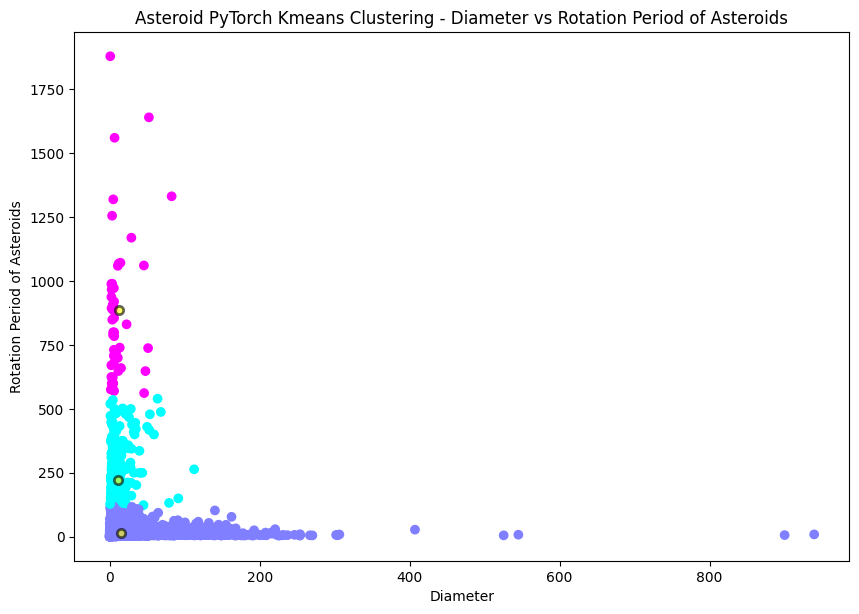

In [ ]:
# plot
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', alpha=0.6, edgecolors='black', linewidths=2)
plt.title('Asteroid PyTorch Kmeans Clustering - Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.show()
